In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Projects\Tweet_Sentiment_Classification\tweet_sentiment.csv")


In [4]:
data.head()

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


In [5]:
# Display basic information about the dataset
print("\nDataset Info:")
data.info()

# Display basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display unique values in sentiment column
print("\nUnique Sentiment Values:")
print(data['sentiment'].value_counts())

# Calculate percentage distribution of sentiments
print("\nSentiment Distribution (%):")
print(data['sentiment'].value_counts(normalize=True) * 100)

# Display some basic text statistics
print("\nTweet Length Statistics:")
data['tweet_length'] = data['tweet'].str.len()
print(data['tweet_length'].describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB

Basic Statistics:
                        tweet sentiment
count                    1000      1000
unique                     17         3
top     Fantastic experience!  positive
freq                       71       396

Missing Values:
tweet        0
sentiment    0
dtype: int64

Unique Sentiment Values:
sentiment
positive    396
neutral     317
negative    287
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment
positive    39.6
neutral     31.7
negative    28.7
Name: proportion, dtype: float64

Tweet Length Statistics:
count    1000.000000
mean       24.608000
std         4.524025
min        17.000000
25%        21.000000
50%        24.000000
75%        27.00000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        55
     neutral       1.00      1.00      1.00        67
    positive       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



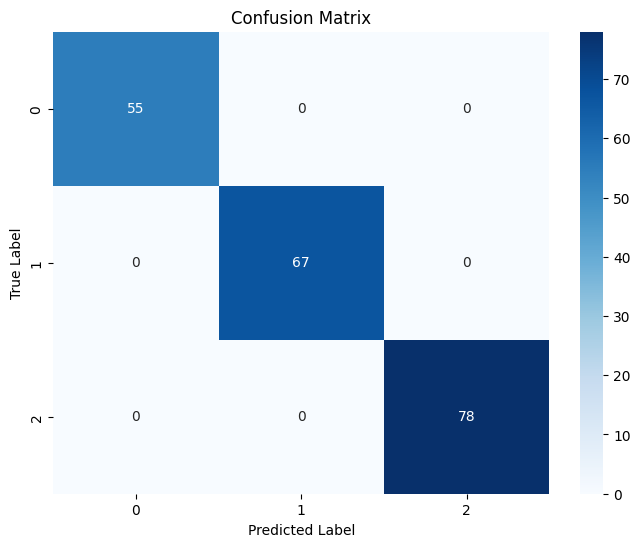


Example Predictions:
Tweet: I absolutely love this product!
Predicted Sentiment: positive

Tweet: This is terrible, don't buy it.
Predicted Sentiment: negative

Tweet: It's okay, nothing special.
Predicted Sentiment: negative

Tweet: I'm so happy with my purchase!
Predicted Sentiment: positive

Tweet: I'm disappointed with the service.
Predicted Sentiment: negative

Tweet: This product is amazing!
Predicted Sentiment: negative

Tweet: I'm not sure I'll buy this again.
Predicted Sentiment: negative

Tweet: I'm excited about the new features!
Predicted Sentiment: negative

Tweet: I'm not happy with the price.
Predicted Sentiment: positive

Tweet: I'm not sure I'll buy this again.
Predicted Sentiment: negative

Tweet: I hate it
Predicted Sentiment: negative

Tweet: I love it
Predicted Sentiment: negative

Tweet: I am very happy
Predicted Sentiment: positive



In [9]:
# Import required libraries for text processing and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = data['tweet']
y = data['sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the text data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Function to predict sentiment for new tweets
def predict_sentiment(tweet):
    # Transform the new tweet
    tweet_tfidf = tfidf.transform([tweet])
    # Make prediction
    prediction = model.predict(tweet_tfidf)
    return prediction[0]

# Example usage
example_tweets = [
    "I absolutely love this product!",
    "This is terrible, don't buy it.",
    "It's okay, nothing special.",
    "I'm so happy with my purchase!",
    "I'm disappointed with the service.",
    "This product is amazing!",
    "I'm not sure I'll buy this again.",
    "I'm excited about the new features!",
    "I'm not happy with the price.",
    "I'm not sure I'll buy this again.",
    "I hate it",
    "I love it",
    "I am very happy"
]

print("\nExample Predictions:")
for tweet in example_tweets:
    sentiment = predict_sentiment(tweet)
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment}\n")
